In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

# 경고 무시 설정
warnings.filterwarnings("ignore")

# 기본 폰트를 DejaVu Sans로 설정
plt.rcParams['font.family'] = 'DejaVu Sans'

### 3, 4, 5, 6호기 데이터셋 로드

In [ ]:
data_path = '/content/drive/MyDrive/공모전/제12회공공데이터활용아이디어공모전/Inputs/'
No3_data = pd.read_csv(data_path + 'No3_data.csv')
No4_data = pd.read_csv(data_path + 'No4_data.csv')
No5_data = pd.read_csv(data_path + 'No5_data.csv')
No6_data = pd.read_csv(data_path + 'No6_data.csv')

In [ ]:
No3_data.count()

datetime             53280
power_generation     53280
outlet_sox(15ppm)    53280
3호기 배출정상\n여부         53280
inlet_sox            53280
limestone            53280
dtype: int64

In [ ]:
No4_data.count()

datetime             53280
power_generation     53280
outlet_sox(25ppm)    53280
4호기 배출정상\n여부         53280
inlet_sox            53280
limestone            53280
dtype: int64

# 3호기 데이터셋 시각화

## 1. KDE 플롯

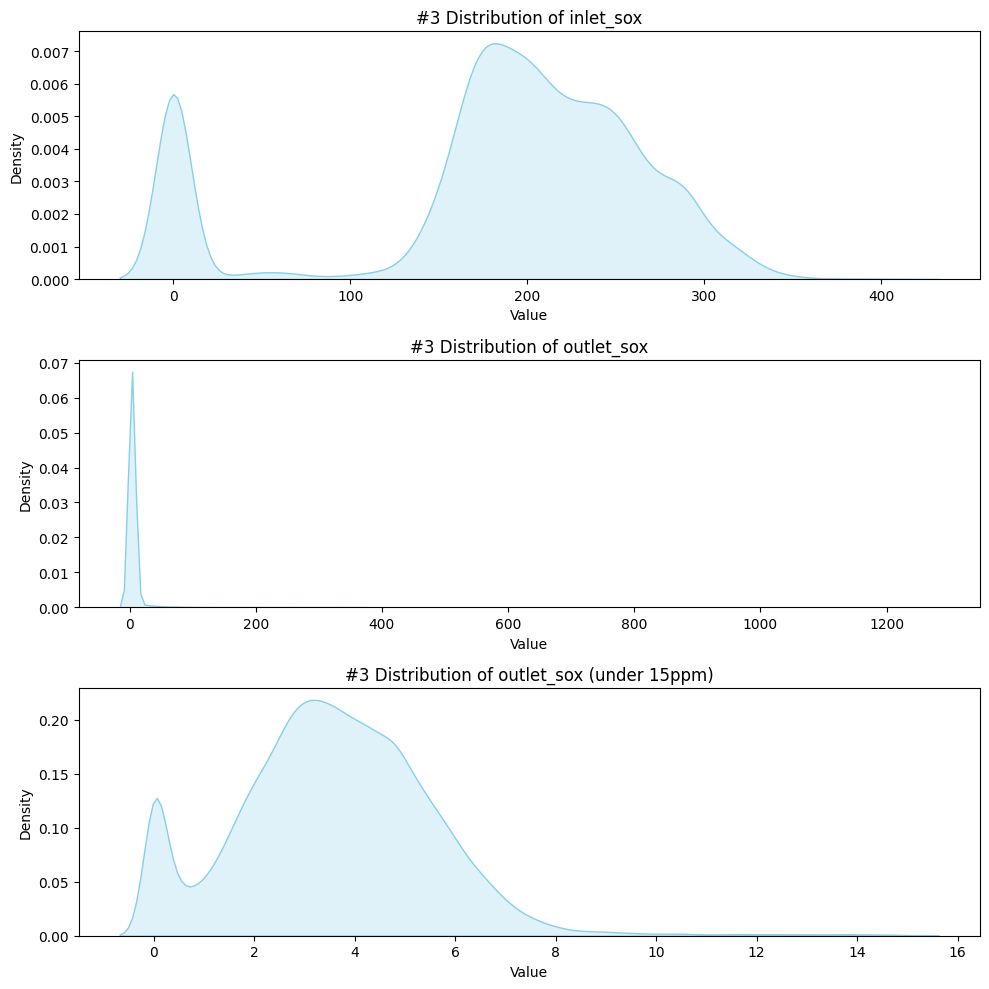

In [ ]:
# outlet_sox(15ppm) 15 미만인 데이터셋 생성
No3_data_under15ppm = No3_data[No3_data['outlet_sox(15ppm)'] < 15]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No3_data['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#3 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(15ppm) 분포
sns.kdeplot(No3_data['outlet_sox(15ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#3 Distribution of outlet_sox')

# 세 번째 KDE 플롯: outlet_sox(15ppm) 15ppm 미만 분포
sns.kdeplot(No3_data_under15ppm['outlet_sox(15ppm)'], shade=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('#3 Distribution of outlet_sox (under 15ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 2. 히스토그램

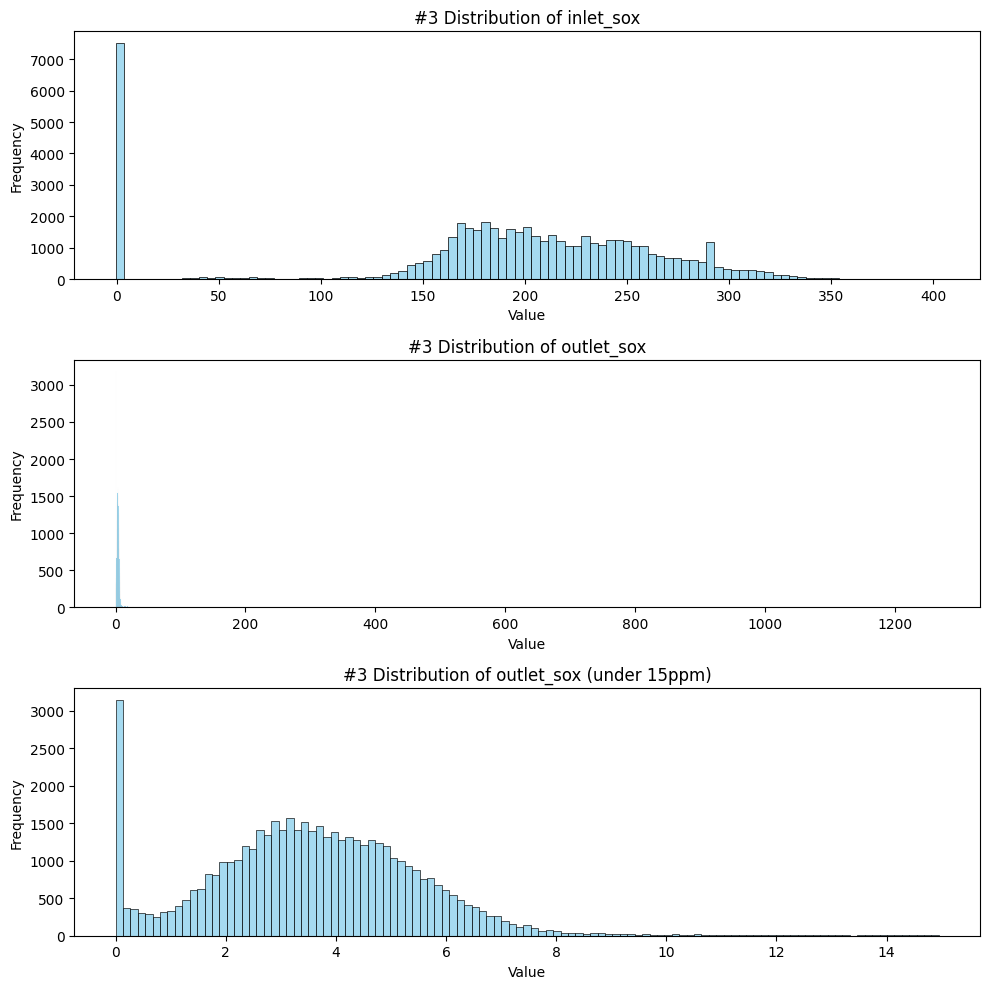

In [ ]:
# outlet_sox(15ppm) 15 미만인 데이터셋 생성
No3_data_under15ppm = No3_data[No3_data['outlet_sox(15ppm)'] < 15]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 히스토그램: inlet_sox 분포
sns.histplot(No3_data['inlet_sox'], kde=False, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('#3 Distribution of inlet_sox')

# 두 번째 히스토그램: outlet_sox(15ppm) 분포
sns.histplot(No3_data['outlet_sox(15ppm)'], kde=False, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('#3 Distribution of outlet_sox')

# 세 번째 히스토그램: outlet_sox(15ppm) 15ppm 미만 분포
sns.histplot(No3_data_under15ppm['outlet_sox(15ppm)'], kde=False, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')
axes[2].set_title('#3 Distribution of outlet_sox (under 15ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

## 3. 이상치 제거 후 KDE 플롯

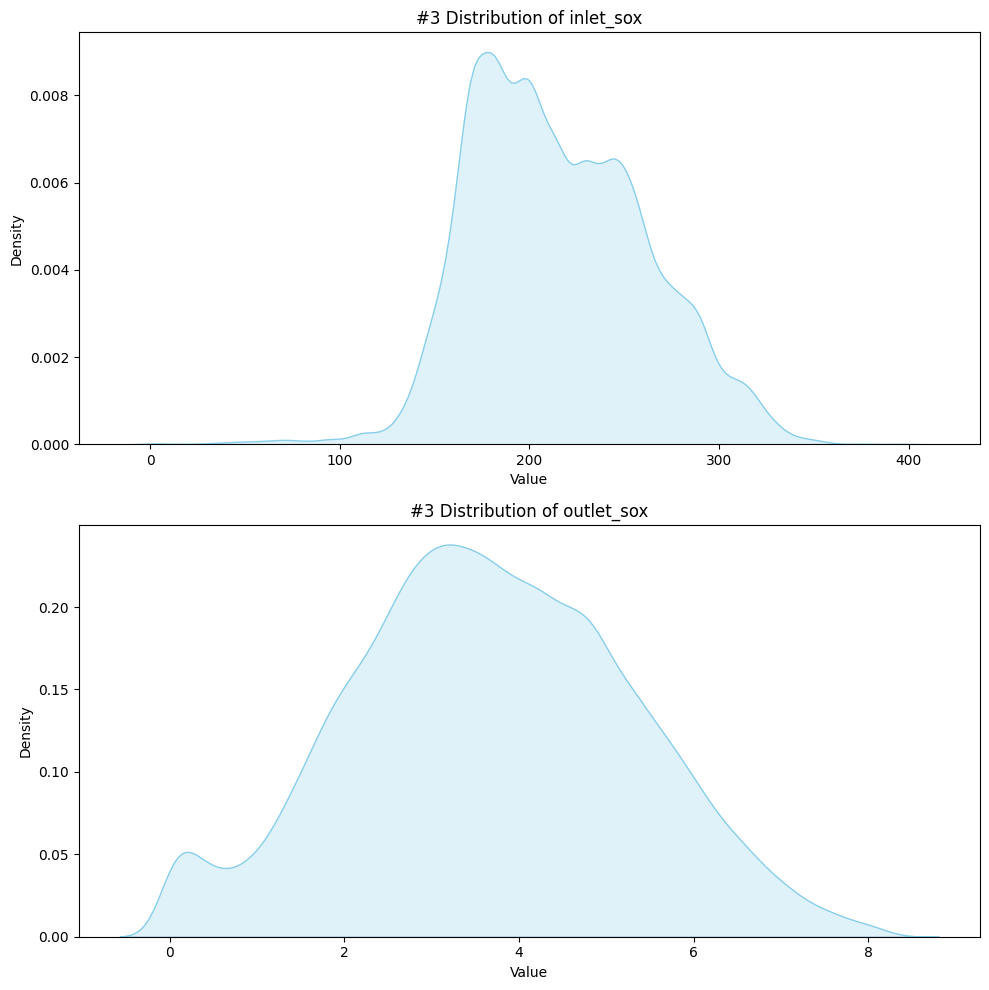

In [ ]:
# 이상치 제거
No3_data.drop(No3_data[No3_data['inlet_sox'] == 0].index, inplace=True)
No3_data.drop(No3_data[No3_data['power_generation'] == 0].index, inplace=True)
No3_data.drop(No3_data[No3_data['power_generation'] == 1].index, inplace=True)
# 'outlet_sox(15ppm)' 칼럼의 사분위수 계산
Q1 = No3_data['outlet_sox(15ppm)'].quantile(0.25)
Q3 = No3_data['outlet_sox(15ppm)'].quantile(0.75)
IQR = Q3 - Q1
# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치 제거
No3_data_filtered = No3_data[(No3_data['outlet_sox(15ppm)'] >= lower_bound) & (No3_data['outlet_sox(15ppm)'] <= upper_bound)]

# 서브플롯 설정
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No3_data_filtered['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#3 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(15ppm) 분포
sns.kdeplot(No3_data_filtered['outlet_sox(15ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#3 Distribution of outlet_sox')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 4호기 데이터셋 시각화

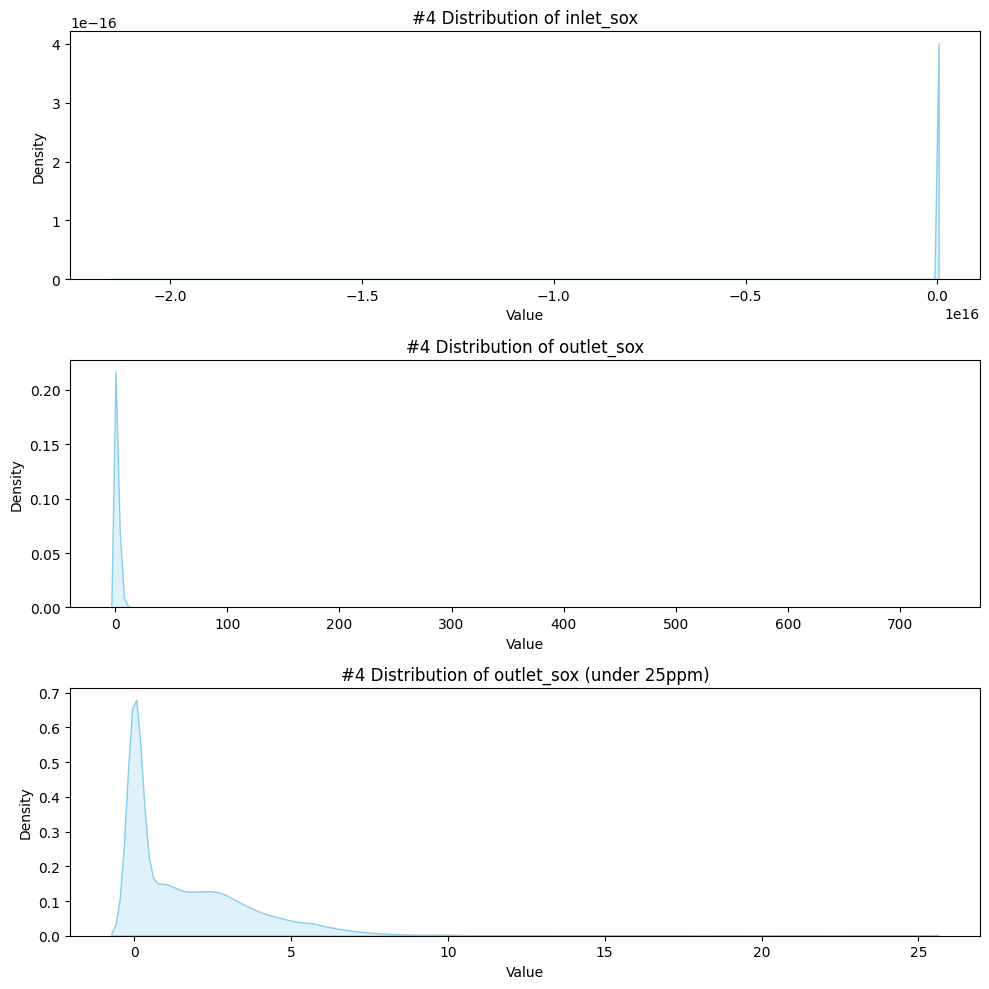

In [ ]:
# outlet_sox(25ppm) 25 미만인 데이터셋 생성
No4_data_under15ppm = No4_data[No4_data['outlet_sox(25ppm)'] < 25]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No4_data['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#4 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(25ppm) 분포
sns.kdeplot(No4_data['outlet_sox(25ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#4 Distribution of outlet_sox')

# 세 번째 KDE 플롯: outlet_sox(25ppm) 25ppm 미만 분포
sns.kdeplot(No4_data_under15ppm['outlet_sox(25ppm)'], shade=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('#4 Distribution of outlet_sox (under 25ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

히스토그램으로 나타내려 하니 메모리 이슈로 에러가 남



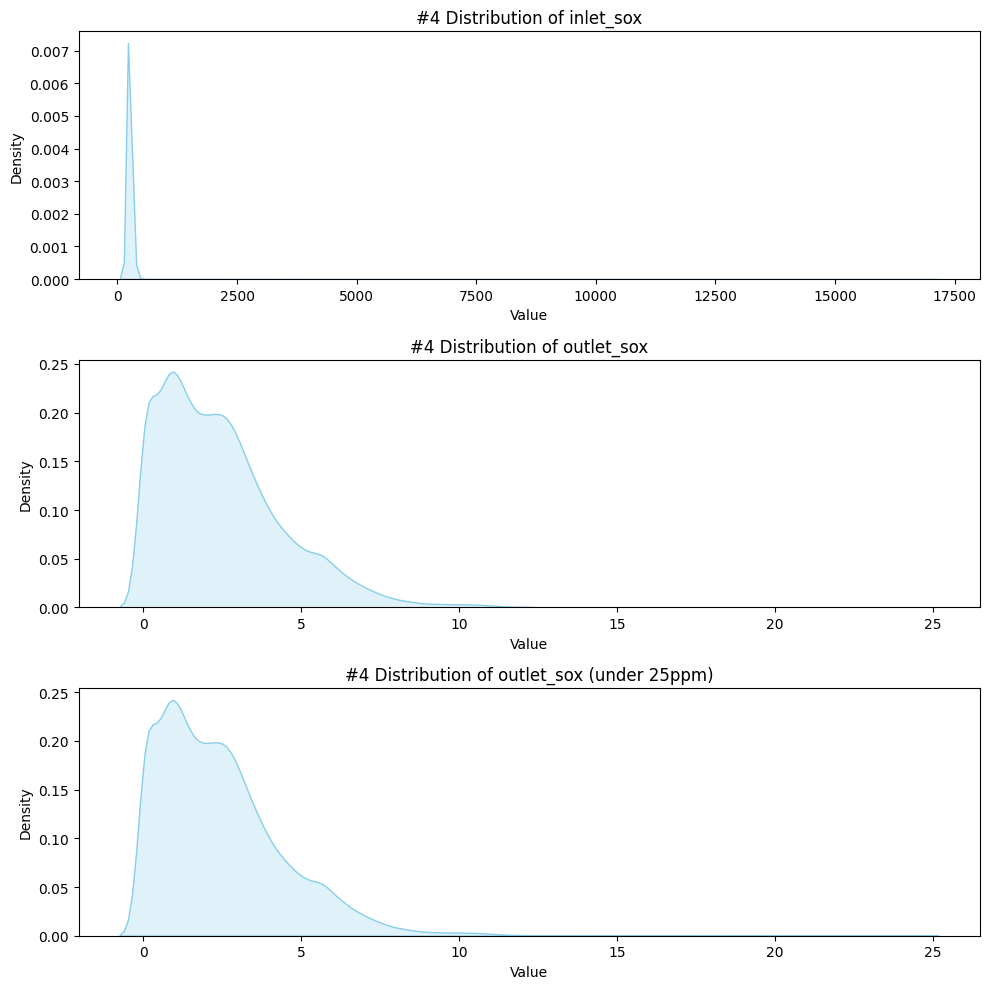

In [ ]:
# 조건을 만족하는 데이터 선택
No4_data_preprocess = No4_data[(No4_data['inlet_sox'] > 100) & (No4_data['outlet_sox(25ppm)'] < 25)]


# outlet_sox(25ppm) 25 미만인 데이터셋 생성
No4_data_under25ppm = No4_data_preprocess[No4_data_preprocess['outlet_sox(25ppm)'] < 25]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No4_data_preprocess['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#4 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(25ppm) 분포
sns.kdeplot(No4_data_preprocess['outlet_sox(25ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#4 Distribution of outlet_sox')

# 세 번째 KDE 플롯: outlet_sox(25ppm) 25ppm 미만 분포
sns.kdeplot(No4_data_under25ppm['outlet_sox(25ppm)'], shade=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('#4 Distribution of outlet_sox (under 25ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 5호기 데이터셋 시각화

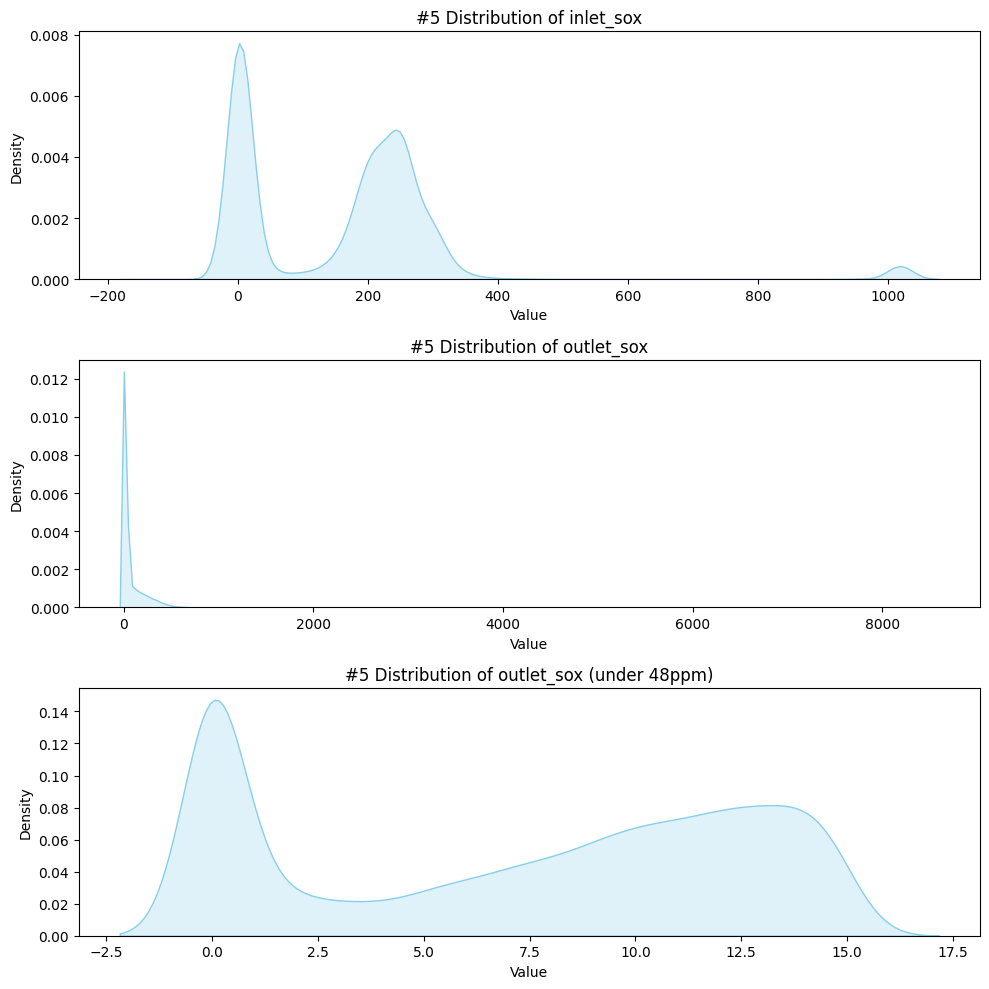

In [ ]:
# outlet_sox(48ppm) 48 미만인 데이터셋 생성
No5_data_under15ppm = No5_data[No5_data['outlet_sox(48ppm)'] < 15]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No5_data['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#5 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(48ppm) 분포
sns.kdeplot(No5_data['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#5 Distribution of outlet_sox')

# 세 번째 KDE 플롯: outlet_sox(48ppm) 48ppm 미만 분포
sns.kdeplot(No5_data_under15ppm['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('#5 Distribution of outlet_sox (under 48ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

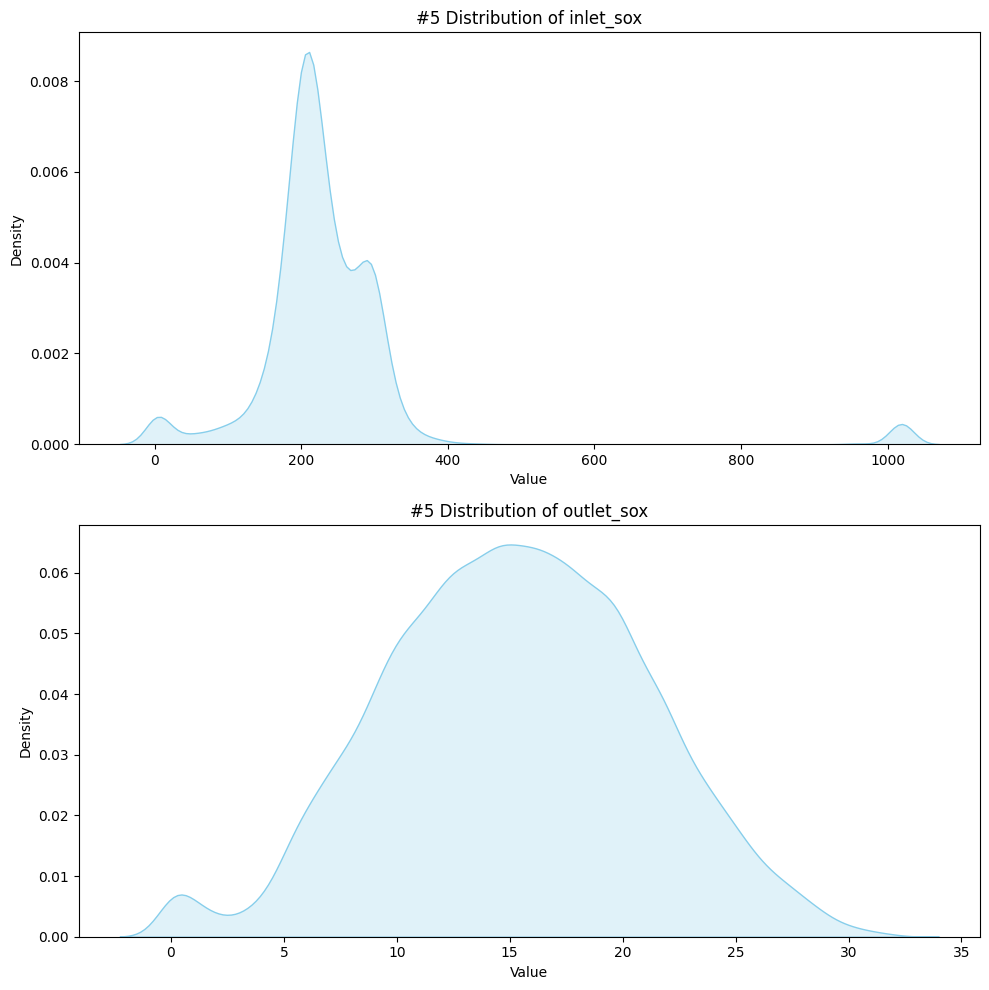

In [ ]:
# 이상치 제거
No5_data.drop(No5_data[No5_data['inlet_sox'] == 0].index, inplace=True)
No5_data.drop(No5_data[No5_data['power_generation'] == 0].index, inplace=True)
No5_data.drop(No5_data[No5_data['power_generation'] == 1].index, inplace=True)
# 'outlet_sox(48ppm)' 칼럼의 사분위수 계산
Q1 = No5_data['outlet_sox(48ppm)'].quantile(0.25)
Q3 = No5_data['outlet_sox(48ppm)'].quantile(0.75)
IQR = Q3 - Q1
# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치 제거
No5_data_filtered = No5_data[(No5_data['outlet_sox(48ppm)'] >= lower_bound) & (No5_data['outlet_sox(48ppm)'] <= upper_bound)]

# 서브플롯 설정
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No5_data_filtered['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#5 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(48ppm) 분포
sns.kdeplot(No5_data_filtered['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#5 Distribution of outlet_sox')

# 레이아웃 조정
plt.tight_layout()
plt.show()

# 6호기 데이터셋 시각화

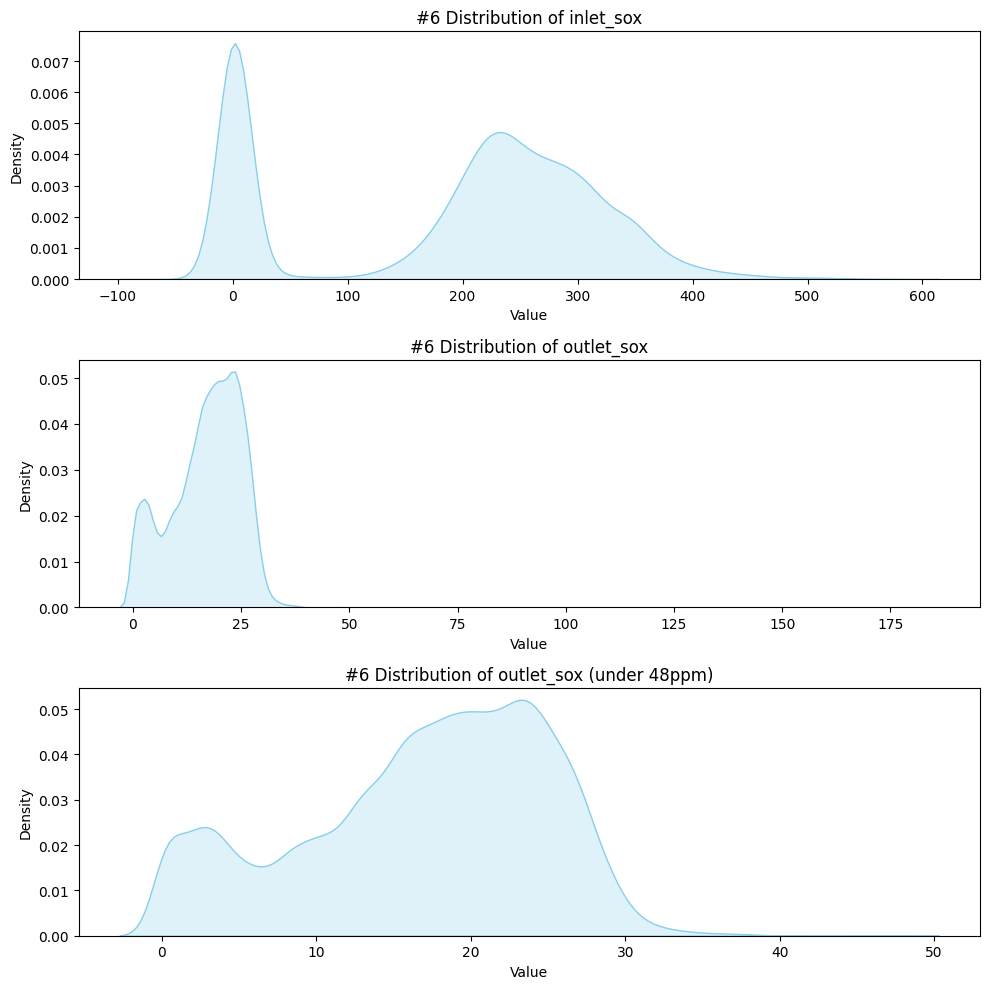

In [ ]:
# outlet_sox(48ppm) 48 미만인 데이터셋 생성
No6_data_under48ppm = No6_data[No6_data['outlet_sox(48ppm)'] < 48]

# 서브플롯 설정
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No6_data['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#6 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(48ppm) 분포
sns.kdeplot(No6_data['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#6 Distribution of outlet_sox')

# 세 번째 KDE 플롯: outlet_sox(48ppm) 48ppm 미만 분포
sns.kdeplot(No6_data_under48ppm['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[2])
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Density')
axes[2].set_title('#6 Distribution of outlet_sox (under 48ppm)')

# 레이아웃 조정
plt.tight_layout()
plt.show()

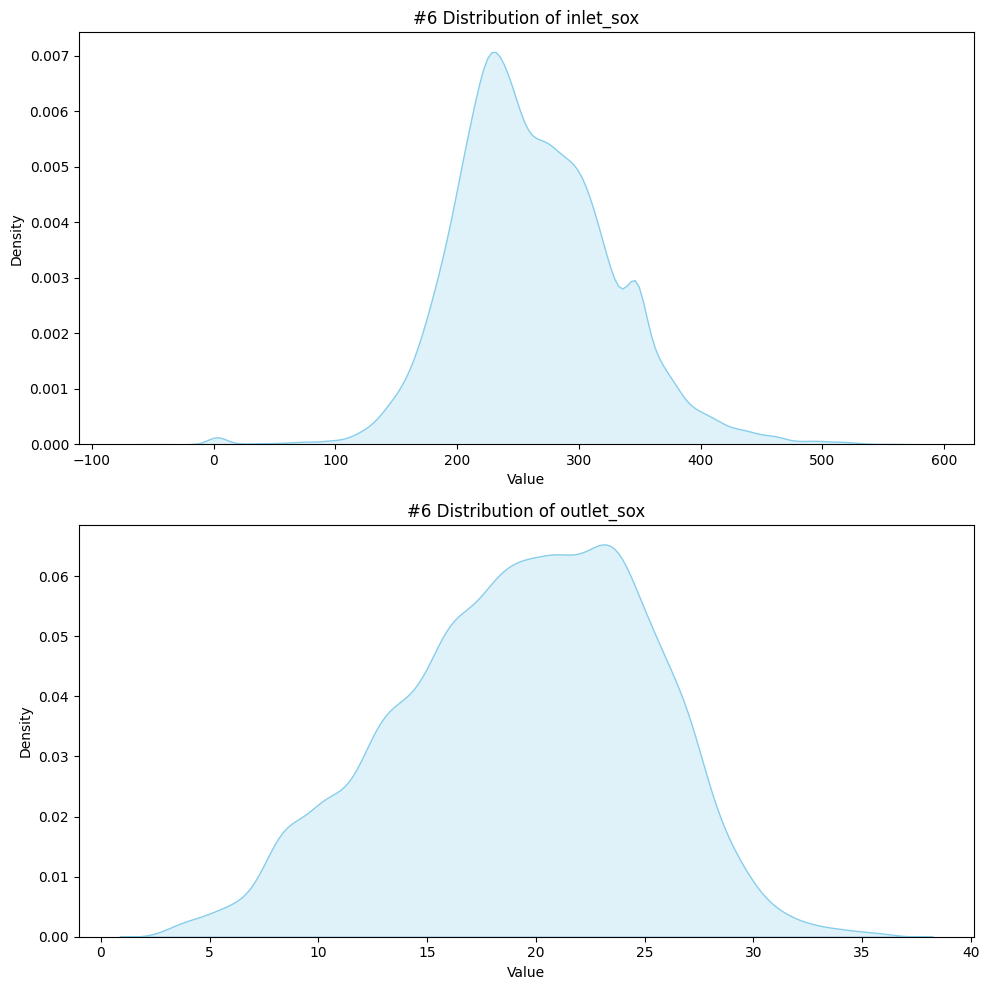

In [ ]:
# 이상치 제거
No6_data.drop(No6_data[No6_data['inlet_sox'] == 0].index, inplace=True)
No6_data.drop(No6_data[No6_data['power_generation'] == 0].index, inplace=True)
No6_data.drop(No6_data[No6_data['power_generation'] == 1].index, inplace=True)
# 'outlet_sox(48ppm)' 칼럼의 사분위수 계산
Q1 = No6_data['outlet_sox(48ppm)'].quantile(0.25)
Q3 = No6_data['outlet_sox(48ppm)'].quantile(0.75)
IQR = Q3 - Q1
# 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# 이상치 제거
No6_data_filtered = No6_data[(No6_data['outlet_sox(48ppm)'] >= lower_bound) & (No6_data['outlet_sox(48ppm)'] <= upper_bound)]

# 서브플롯 설정
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# 첫 번째 KDE 플롯: inlet_sox 분포
sns.kdeplot(No6_data_filtered['inlet_sox'], shade=True, color='skyblue', ax=axes[0])
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')
axes[0].set_title('#6 Distribution of inlet_sox')

# 두 번째 KDE 플롯: outlet_sox(48ppm) 분포
sns.kdeplot(No6_data_filtered['outlet_sox(48ppm)'], shade=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')
axes[1].set_title('#6 Distribution of outlet_sox')

# 레이아웃 조정
plt.tight_layout()
plt.show()

In [ ]:
No3_data_filtered.to_csv(data_path + 'No3_data_filtered', index=False)
No5_data_filtered.to_csv(data_path + 'No5_data_filtered', index=False)
No6_data_filtered.to_csv(data_path + 'No6_data_filtered', index=False)

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/공모전/제12회공공데이터활용아이디어공모전/Inputs/Simulation_Data__Limestone_Usage_vs__SOx_Emissions_.csv'
df = pd.read_csv(file_path)

In [5]:
df

,Limestone_Usage,SOx_Emissions,Limestone_bin
0,30,372.573965,"(25, 30]"
1,15,371.937749,"(10, 15]"
2,60,356.658665,"(55, 60]"
3,70,282.104892,"(65, 70]"
4,50,201.091539,"(45, 50]"
...,...,...,...
995,0,412.960901,NaN
996,20,459.652819,"(15, 20]"
997,65,380.137613,"(60, 65]"
998,40,393.849304,"(35, 40]"
